# Binary Classification

In [3]:
import os
import random
import math

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import tensorflow as tf
import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense

In [4]:
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

block_plot = False

In [5]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

### Generate Data

In [28]:
# Generate some synthetic data
def generate_data(
    mean_0=[4.0, 20.0],
    stddev_0=[1.0, 1.0],
    mean_1=[5.5, 23.0],
    stddev_1=[0.6, 0.8],
    num_points_0=200,
    num_points_1=200,
):
    class_0_points = tf.random.normal(
        (num_points_0, 2), mean_0, stddev_0, dtype=tf.float64
    )
    class_1_points = tf.random.normal(
        (num_points_1, 2), mean_1, stddev_1, dtype=tf.float64
    )

    return class_0_points, class_1_points

### Visualise the dataset

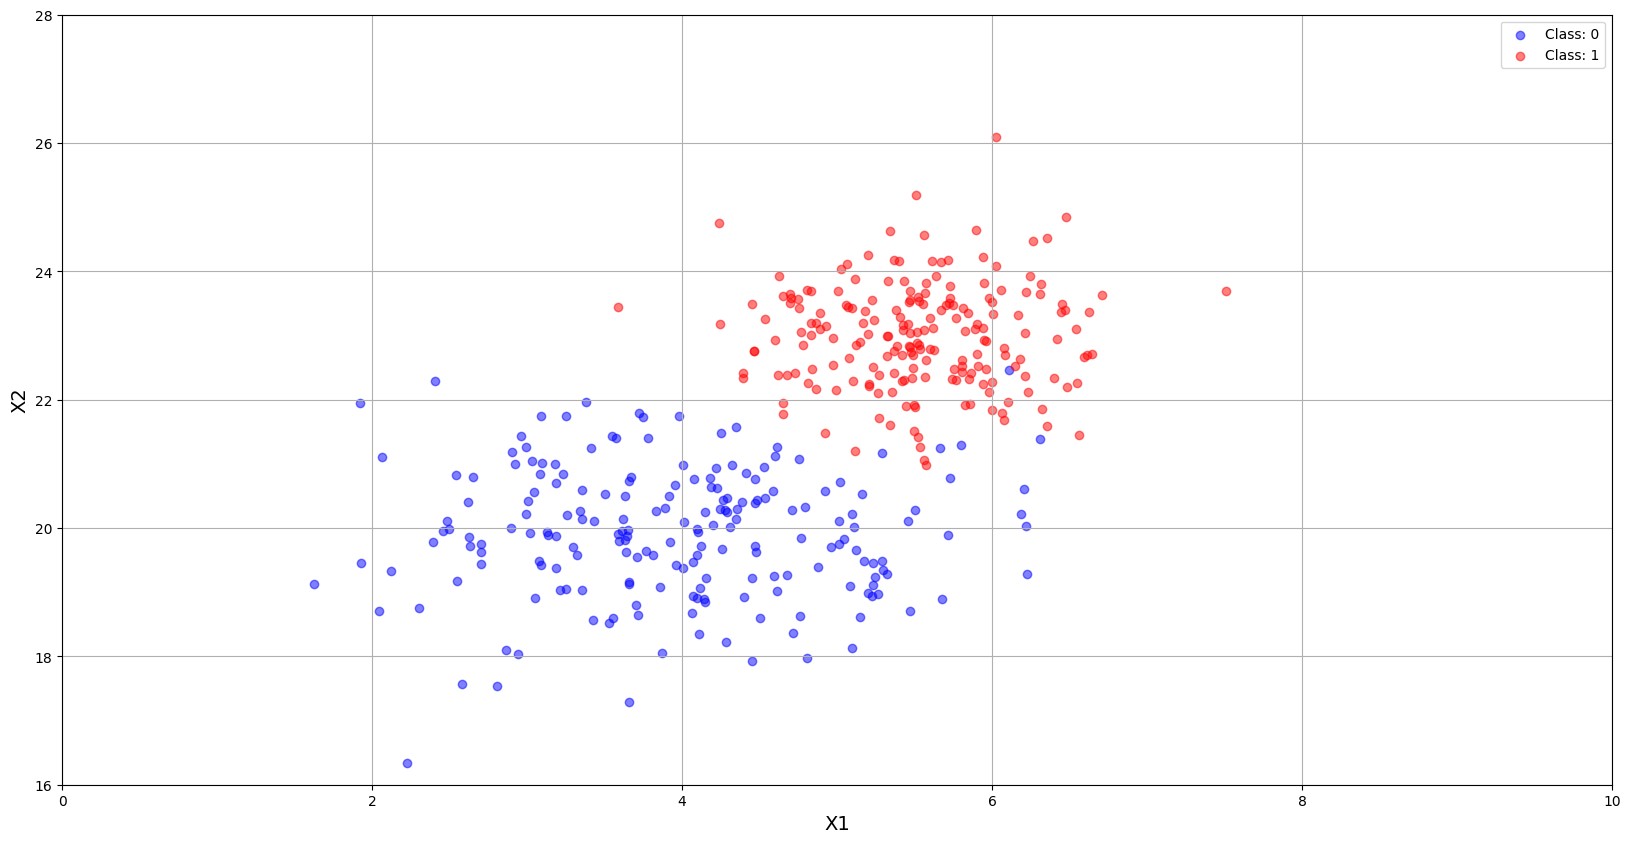

In [29]:
# Plot input data
class0Points, class1Points = generate_data()

plt.figure(figsize=(20, 10))
plt.scatter(
    class0Points[:, 0],
    class0Points[:, 1],
    color="blue",
    alpha=0.5,
    label="Class: 0",
)
plt.scatter(
    class1Points[:, 0],
    class1Points[:, 1],
    color="red",
    alpha=0.5,
    label="Class: 1",
)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim([0, 10])
plt.ylim([16, 28])
plt.grid(True)

plt.show(block=block_plot)
plt.close()

### Data Preparation

In [30]:
# Combine the features and labels from both classes into their respective arrays
def prepare_data(class_0_points, class_1_points):
    label0 = np.zeros(class_0_points.shape[0], dtype=np.float32)
    label1 = np.ones(class_1_points.shape[0], dtype=np.float32)

    labels = np.expand_dims(tf.concat([label0, label1], axis=0), 1)
    datapoints = np.vstack(
        [class_0_points, class_1_points],
    )

    print(f"Data points shape: {datapoints.shape}")
    print(f"Labels shape: {labels.shape}")

    return datapoints, labels

In [31]:
X_train, y_train = prepare_data(class0Points, class1Points)

Data points shape: (400, 2)
Labels shape: (400, 1)


The shape (400, 2) means that there are 400 rows and 2 columns. 
The rows are used to indicate individual samples, and columns are used to indicate features. 
Each row has 2 values (2 feature values).

Almost all frameworks use the convention:

 - axis=0 represents the rows,
 - axis=1 represents the columns.

### Define Normalisation Layer

In [32]:
# Set 'axis' to be the axis of the feature dimension. Since the input shape is
# (num_points, 2), we need to set axis=1 to indicate the feature axis.
# Setting axis=-1 would also work in this case since a -1 indicates the last axis.
dataNormaliser = layers.Normalization(
    input_shape=[
        2,
    ],
    axis=1,
)

# Class the `adapt` method to apply the normalisation
dataNormaliser.adapt(X_train)

print("Mean: ", dataNormaliser.mean.numpy()[0])
print("Variance: ", dataNormaliser.variance.numpy()[0])
print("Count: ", dataNormaliser.count.numpy())

Mean:  [ 4.7487817 21.460804 ]
Variance:  [1.2489529 3.1871152]
Count:  0


/Users/tapasyagutta/workspace/deep-learning/.tkVenv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Architecture Definition

In [33]:
model = keras.Sequential()
model.add(dataNormaliser)
# model.add(keras.Input(shape=(2,)))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 5 (24.00 B)

### Compile the model

In [34]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["binary_accuracy"])

### Train the model

In [35]:
history = model.fit(
    x=X_train, y=y_train, batch_size=16, epochs=100, shuffle=True, verbose=False
)

history.history.keys()

dict_keys(['binary_accuracy', 'loss'])

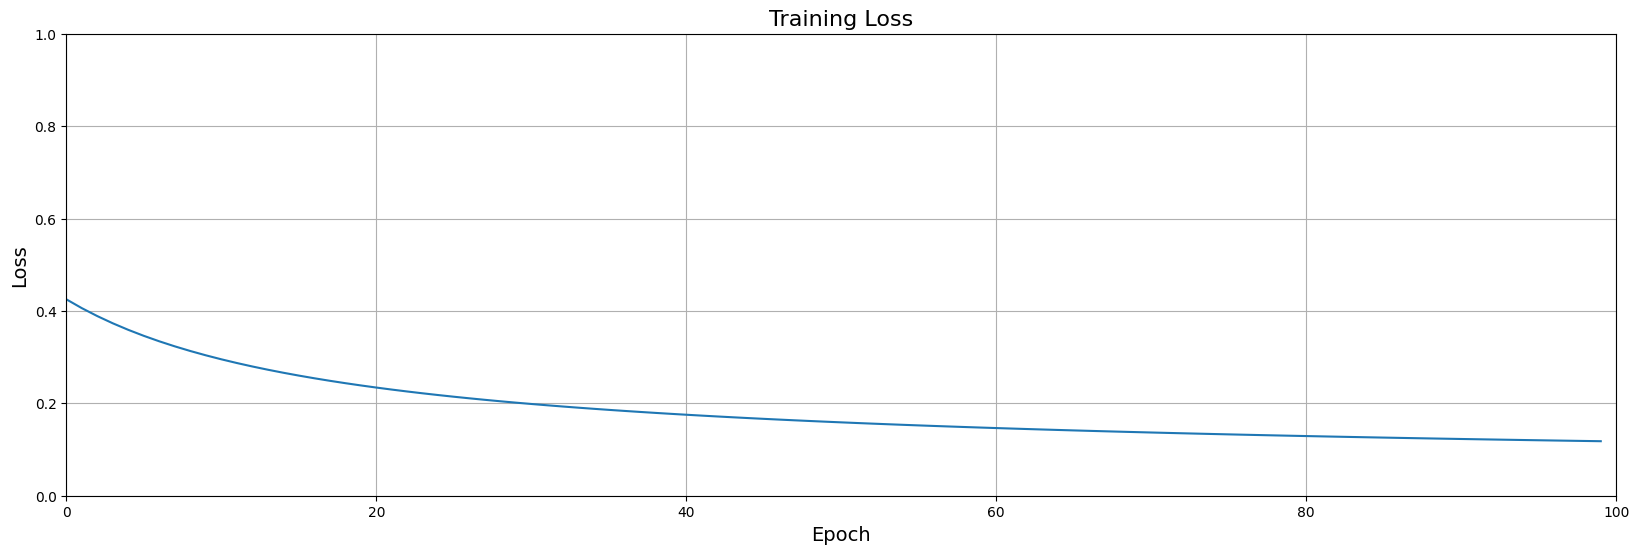

In [36]:
loss = history.history["loss"]
binaryAccuracy = history.history["binary_accuracy"]
# print(loss)

plt.figure(figsize=(20, 6))
plt.plot(range(len(loss)), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.grid(True)

plt.show(block=block_plot)
# plt.close()

### Evaluate Model Accuracy on Training Data

In [37]:
final_stats = model.evaluate(X_train, y_train, batch_size=16, return_dict=True)

print("\n\nFinal Stats")
print(f"Final Accuracy: {final_stats['binary_accuracy']}")
print(f"Final Loss: {final_stats['loss']}")
print(final_stats)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - binary_accuracy: 0.9775 - loss: 0.1177


Final Stats
Final Accuracy: 0.9775000214576721
Final Loss: 0.11771964281797409
{'binary_accuracy': 0.9775000214576721, 'loss': 0.11771964281797409}


(0.0, 1.0)

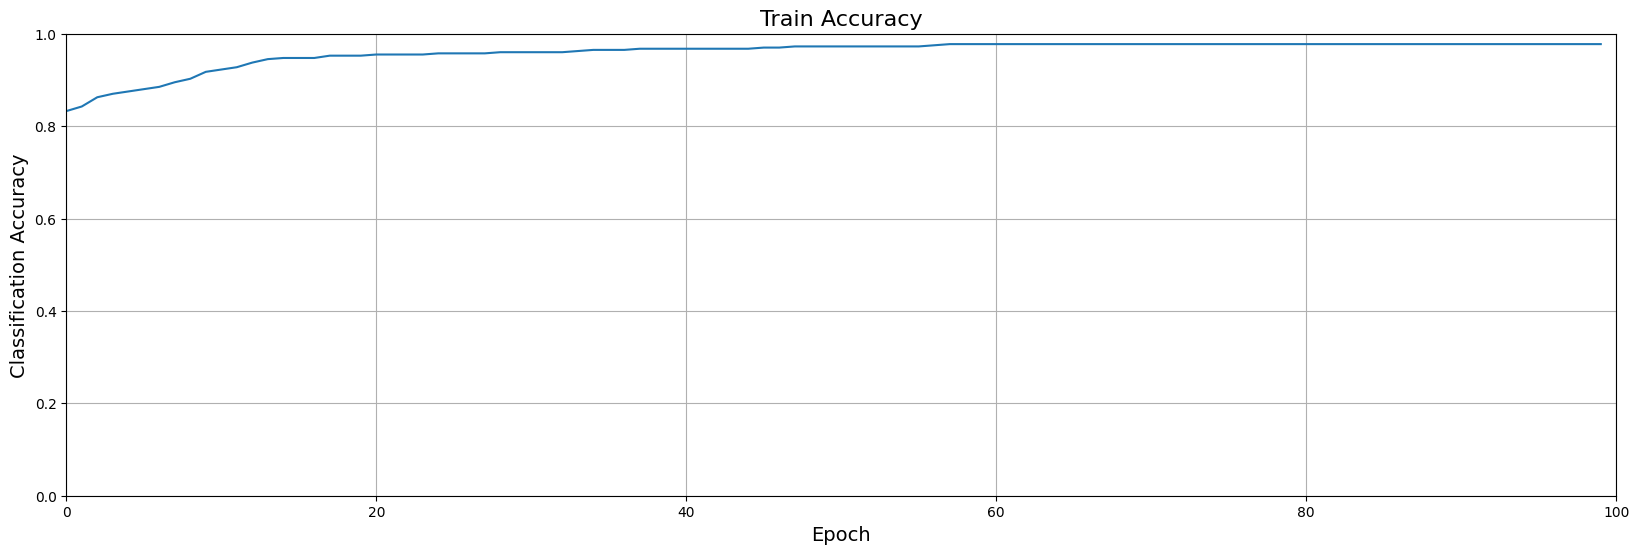

In [38]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(binaryAccuracy)), binaryAccuracy)
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
plt.title("Train Accuracy")
plt.grid(True)
plt.xlim([0, 100])
plt.ylim([0, 1])

### Model Prediction

In [39]:
# Use the predict() method in Keras to get a predicted score for some example input features.
pred_score_1 = model.predict(np.array([[5.0, 21.0]]))
pred_score_2 = model.predict(np.array([[5.0, 22.0]]))


# Define a function that maps the predicted score to the appropriate class name.
def pred_class(pred):

    if pred > 0.5:
        class_label = "Austin"
    else:
        class_label = "Ezra"

    return class_label


class_label_1 = pred_class(pred_score_1)
class_label_2 = pred_class(pred_score_2)

print("")
print("Tumor-1: ", class_label_1)
print("Tumor-2: ", class_label_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Tumor-1:  Ezra
Tumor-2:  Austin


2025-10-25 14:04:42.465830: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


### Model Diagnostics: The Role of the Activation Function

In [40]:
# Neuron: WX + B
def wx_plus_b(W, X, B):
    return tf.matmul(W, X) + B


# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [41]:
# Retrieve models from weights
weights = model.layers[1].get_weights()[0]
w1 = weights[0][0]
w2 = weights[1][0]
b = model.layers[1].get_weights()[1]

print("Weights associated with normalised data")
print(f"b: {b}\nw1: {w1}\nw2: {w2}\n")

# Retrieve normalisation statistics
norm_mean = dataNormaliser.mean.numpy()[0]
norm_variance = dataNormaliser.variance.numpy()[0]

stdDev1 = math.sqrt(norm_variance[0])
stdDev2 = math.sqrt(norm_variance[1])

mean1 = norm_mean[0]
mean2 = norm_mean[1]

# Unnormalise the statistics for diagnostics
w1 /= stdDev1
w2 /= stdDev2
b = b - w1 * mean1 - w2 * mean2

print("Weights associated with unnormalised data")
print(f"b: {b}\nw1: {w1}\nw2: {w2}\n")

Weights associated with normalised data
b: [-0.19964504]
w1: 1.777948260307312
w2: 2.332411289215088

Weights associated with unnormalised data
b: [-35.792877]
w1: 1.5909117460250854
w2: 1.3064905405044556



The network is designed to compute the following eqation: 

$$
y_{predicted} = A(w1*x1 + w2*x2 + b)
$$

`A` represents the activation function. 

When the dataset passes through a normalization layer where it's changed to have `0` mean and `1` std dev.
So, the inputs `x1` and `x2` have changed. They are now represented as:

$$
x1_{standardised} = \frac{x1 - x1_{mean}}{\sigma_1}
$$

$$
x2_{standardised} = \frac{x2 - x2_{mean}}{\sigma_2}
$$

Replacing `x1` as `x1_{standardised}` and doing the same with `x2`, we have:

$$
y_{predicted} = A(w1*x1_{standardised} + w2*x2_{standardised} + b)
$$

So if want to pass the data unnormalizd through the function wx_plus_b, we need to change the weights to be able to handle unnormalized data.

$$
y_{predicted} = A(w1*{\frac{x1 - x1_{mean}}{\sigma_1}} + w2*\frac{x2 - x2_{mean}}{\sigma_2} + b)
$$

By opening brackets and re-arranging terms, you'll get:

$$
y_{predicted} = A(x1*{\frac{w1}{\sigma_1}} + x2*{\frac{w2}{\sigma_2}} + (b - \frac{w1*x1_{mean}}{\sigma_1} - \frac{w2*x2_{mean}}{\sigma_2}))
$$

Since the last bracket terms include only constants, we denote them as b:

$$w1 = \frac{w1}{\sigma_1}$$
$$w2 = \frac{w2}{\sigma_2}$$
$$b = b - w1*mean_1 - w2*mean_2$$


### Plot Sigmoid Activations

In [47]:
W = np.zeros(shape=(2, 1))
W[0][0] = w1
W[1][0] = w2

# Compute sigmoid activations for class0
print(W.shape)
print(class0Points.shape)
print(b.astype(np.float64).shape)
z_0 = wx_plus_b(W, class0Points, b.astype(np.float64))
y_predictions0 = sigmoid(z_0)

# Compute sigmoid activations for class1
z_1 = wx_plus_b(W, class1Points, b.astype(np.float64))
y_predictions1 = sigmoid(z_1)

# Plot the values
plt.figure(figsize=(20, 7))
plt.scatter(z_0, y_predictions0, s=20, color="b", alpha=0.5, label="Class: 0")
plt.scatter(z_1, y_predictions1, s=20, color="red", alpha=0.5, label="Class: 1")
plt.plot([0, 0], [0, 1], color="darkgray")
plt.plot([-10, 10], [0.5, 0.5], color="darkgray")
plt.xlabel("X")
plt.ylabel("Sigmoid(x)")
plt.grid(False)
plt.xlim([-10, 10])
plt.ylim([0, 1])

(2, 1)
(200, 2)
(1,)


InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [2,1], In[1]: [200,2] [Op:MatMul] name: 

### Model Diagnostics: Plot the Decision Boundary

In [48]:
def plot_decision_boundary(b, w1, w2, class_0_points, class_1_points):
    plt.figure(figsize=(20, 8))
    plt.scatter(
        class_0_points[:, 0],
        class_0_points[:, 1],
        color="b",
        alpha=0.5,
        label="Class:0",
    )
    plt.scatter(
        class_1_points[:, 0],
        class_1_points[:, 1],
        color="r",
        alpha=0.5,
        label="Class:1",
    )

    x1 = tf.linspace(0.0, 10.0, 1000)
    x2 = -(w1 / w2) * x1 - b / w2

    plt.plot(x1, x2, c="black", alpha=0.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim([0, 10])
    plt.ylim([16, 28])
    plt.grid(True)
    plt.legend()
    plt.show(block=block_plot)

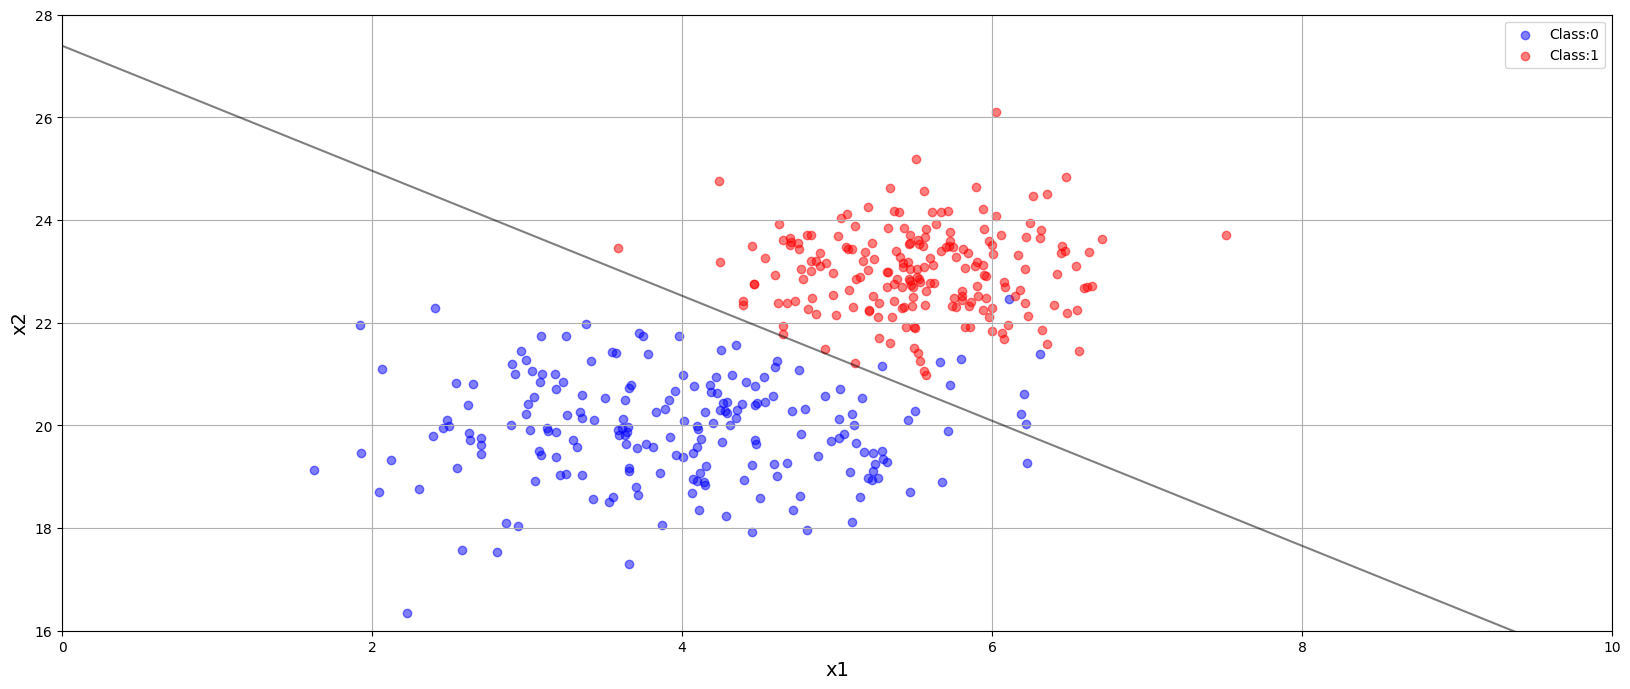

In [49]:
plot_decision_boundary(b, w1, w2, class0Points, class1Points)

### Model Diagnostics: Confusion Matrix

A confusion matrix is a very standard way to summaraize the performance of a classification. In a simple visual table it provides the number (or percentage) of the following clqassifications. 

Class 0 is typically refered to as the negative class and class 1 as the positive class. In many applications these have definite meanings. 

- True  Positive (class 1 is classified as class 1)
- False Positive (class 0 is classified as class 1)
- True  Negative (class 0 is classified as class 0)
- False Negative (class 1 is classified as class 0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step


2025-10-25 14:21:57.274490: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


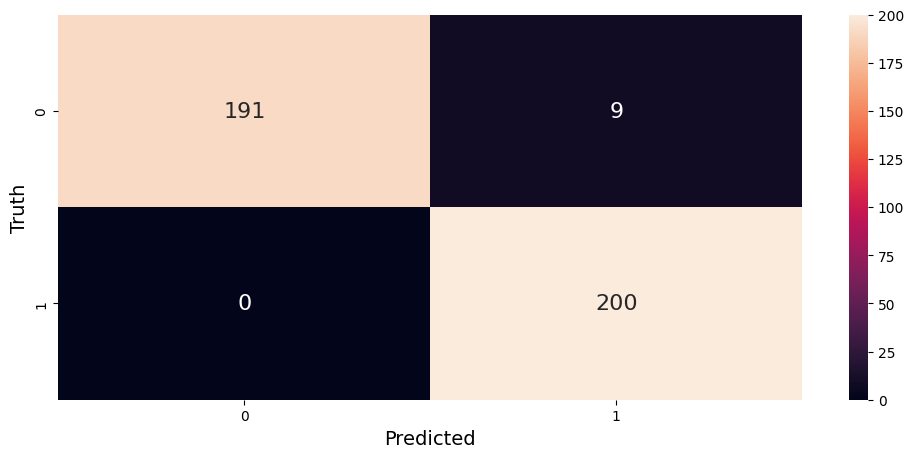

In [50]:
predicted_labels = np.zeros(len(X_train))
predictions = model.predict(X_train)
idx = 0
for pred in predictions:
    if pred > 0.5:
        predicted_labels[idx] = 1
    else:
        predicted_labels[idx] = 0
    idx += 1

# Compute the confusion matrix.
cm = tf.math.confusion_matrix(labels=y_train, predictions=predicted_labels)

plt.figure(figsize=[12, 5])
sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()